<a href="https://www.kaggle.com/code/shrishti2/project-amazon-books-bestsellers?scriptVersionId=125858293" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.lines import Line2D
from warnings import filterwarnings
sns.set_style('whitegrid')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


# Importing dataset to the notebook

In [2]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

# Data Preparation ------ Getting the basic information of dataset nad then performing analysis----------

                              --- Getting the details of dataset as dataframe ---

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


                      --- Checking the type after converting it into data frame---

In [4]:
type(df)

pandas.core.frame.DataFrame

                            ---Reteriving the basic information of the data set---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


The data set seems to be correct as there is non null values are there .

       ---Overview of the numeric data of the dataset such as userrating , reviews , price and year---

In [6]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


                              ---Listing the name of columns present in the dataset---

In [7]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

                              --- Determining the shape of the dataset ---

In [8]:
df.shape

(550, 7)

### Converting the dataframe as an array format using pandas inbuilt function to make the retrieval of data easier from a particular index

In [9]:
amazon_data_dict = { 'Name': ['10-Day Green Smoothie Cleanse','11/22/63: A Novel','You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life','You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life'],
                    'Author':['JJ Smith','Stephen King','Jen Sincero','Jen Sincero'],
                    'User Rating':[4.7,4.6,4.7,4.7],
                    'Reviews':[17350,2052,14331,14331] ,
                    'Price ':[8,22,8,8],
                    'Year':[2016,2011,2018,2019],
                    'Genre':['Non Fiction','Fiction','Non Fiction','Non Fiction']
                       
}

                                --- Viewing the dataframe once again---

In [10]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


                                    ---List of authors in the dataset---

In [11]:
amazon_data_dict['Author']

['JJ Smith', 'Stephen King', 'Jen Sincero', 'Jen Sincero']

                                ---List of the names of the books in the dataset---

In [12]:
df['Name']

0                          10-Day Green Smoothie Cleanse
1                                      11/22/63: A Novel
2                12 Rules for Life: An Antidote to Chaos
3                                 1984 (Signet Classics)
4      5,000 Awesome Facts (About Everything!) (Natio...
                             ...                        
545         Wrecking Ball (Diary of a Wimpy Kid Book 14)
546    You Are a Badass: How to Stop Doubting Your Gr...
547    You Are a Badass: How to Stop Doubting Your Gr...
548    You Are a Badass: How to Stop Doubting Your Gr...
549    You Are a Badass: How to Stop Doubting Your Gr...
Name: Name, Length: 550, dtype: object

                                            ---Datatype of the dataframe ---

In [13]:
type(df['Name'])

pandas.core.series.Series

                                      --- Review of the book at the 50th index---

In [14]:
df['Reviews'][50]

1542

                                  ---User rating of the book at the 50th index--- 

In [15]:
df['User Rating'][50]

4.7

                                   --- List of genre of all the books ---

In [16]:
df.Genre

0      Non Fiction
1          Fiction
2      Non Fiction
3          Fiction
4      Non Fiction
          ...     
545        Fiction
546    Non Fiction
547    Non Fiction
548    Non Fiction
549    Non Fiction
Name: Genre, Length: 550, dtype: object

                                  --- List of the books with their genre ---

In [17]:
Genre_df = df[['Name','Genre']]
Genre_df

,Name,Genre
0,10-Day Green Smoothie Cleanse,Non Fiction
1,11/22/63: A Novel,Fiction
2,12 Rules for Life: An Antidote to Chaos,Non Fiction
3,1984 (Signet Classics),Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",Non Fiction
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Non Fiction


    ---Creating a copy of original dataframe . The data in df is completely separate from df and changing  value inside will not affect the other---

In [18]:
df.copy = df.copy()


                 --- Accessing the information of first row of the data using loc method ---

In [19]:
df.loc[0]

Name           10-Day Green Smoothie Cleanse
Author                              JJ Smith
User Rating                              4.7
Reviews                                17350
Price                                      8
Year                                    2016
Genre                            Non Fiction
Name: 0, dtype: object

                                        --- Reteriving the first 5 rows ---

In [20]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


                                         ---Reteriving the last 5 rows---

In [21]:
df.tail(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


                  --- Reteriving the random 15 rows from the data to draw some conclusions ---

In [22]:
df.sample(15)

,Name,Author,User Rating,Reviews,Price,Year,Genre
486,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2016,Fiction
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
258,Origin: A Novel (Robert Langdon),Dan Brown,4.3,18904,13,2017,Fiction
356,The Complete Ketogenic Diet for Beginners: You...,Amy Ramos,4.3,13061,6,2019,Non Fiction
214,Leonardo da Vinci,Walter Isaacson,4.5,3014,21,2017,Non Fiction
541,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
100,Fahrenheit 451,Ray Bradbury,4.6,10721,8,2016,Fiction
94,Eat to Live: The Amazing Nutrient-Rich Program...,Joel Fuhrman MD,4.5,6346,9,2012,Non Fiction
451,The Pout-Pout Fish,Deborah Diesen,4.8,9784,5,2017,Fiction
464,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.6,26490,15,2017,Non Fiction


# Analyzing Data 

Q1. What are name of distinct books?

In [23]:
df['Name'].unique()

array(['10-Day Green Smoothie Cleanse', '11/22/63: A Novel',
       '12 Rules for Life: An Antidote to Chaos',
       '1984 (Signet Classics)',
       '5,000 Awesome Facts (About Everything!) (National Geographic Kids)',
       'A Dance with Dragons (A Song of Ice and Fire)',
       'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons',
       'A Gentleman in Moscow: A Novel',
       'A Higher Loyalty: Truth, Lies, and Leadership',
       'A Man Called Ove: A Novel',
       "A Patriot's History of the United States: From Columbus's Great Discovery to the War on Terror",
       'A Stolen Life: A Memoir', 'A Wrinkle in Time (Time Quintet)',
       'Act Like a Lady, Think Like a Man: What Men Really Think About Love, Relationships, Intimacy, and Commitment',
       'Adult Coloring Book Designs: Stress Relief Coloring Book: Garden Designs, Mandalas, Animals, and Paisley Patterns',
       'Adult Coloring Book: Stress Relieving Animal Designs',


Q2. Name of different authors?

In [24]:
df['Author'].unique()


array(['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell',
       'National Geographic Kids', 'George R. R. Martin', 'Amor Towles',
       'James Comey', 'Fredrik Backman', 'Larry Schweikart',
       'Jaycee Dugard', "Madeleine L'Engle", 'Steve Harvey',
       'Adult Coloring Book Designs', 'Blue Star Coloring',
       'Coloring Books for Adults', 'Ron Chernow', 'Anthony Doerr',
       'Veronica Roth', 'Chris Kyle', 'Khaled Hosseini', 'Glenn Beck',
       'Neil deGrasse Tyson', 'Mark Twain', 'DK', 'Angie Grace',
       'Ina Garten', 'Michelle Obama', 'Atul Gawande', 'Ta-Nehisi Coates',
       'Bruce Springsteen', 'Stephenie Meyer', 'Bill Martin Jr.',
       'Jeff Kinney', "Sasha O'Hara", 'David Goggins', 'Thomas Piketty',
       'Suzanne Collins', 'Chrissy Teigen', 'Francis Chan', 'Kevin Kwan',
       'Marjorie Sarnat', 'Abraham Verghese', 'Brené Brown',
       'Malcolm Gladwell', 'Charlaine Harris', 'Rod Campbell',
       'George W. Bush', 'Tony Hsieh', 'American Psych

Q3. What is the total profit earned by amazon on each book?

In [25]:
total_profit = df.Price.sum()
print(total_profit,'$')

7205 $


Q4. What is the data type of price row ?

In [26]:
df.dtypes.Price

dtype('int64')


Q5. Converting the data of Price from int to float

In [27]:
df.Price.astype('float64')

0       8.0
1      22.0
2      15.0
3       6.0
4      12.0
       ... 
545     8.0
546     8.0
547     8.0
548     8.0
549     8.0
Name: Price, Length: 550, dtype: float64

# Querying and Sorting the rows

Q6. Getting the list of books having rating less than 4.5

In [28]:
Average_rated = df["User Rating"] < 4.5
df[Average_rated]

,Name,Author,User Rating,Reviews,Price,Year,Genre
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
22,Allegiant,Veronica Roth,3.9,6310,13,2013,Fiction
24,And the Mountains Echoed,Khaled Hosseini,4.3,12159,13,2013,Fiction
27,"Autobiography of Mark Twain, Vol. 1",Mark Twain,4.2,491,14,2010,Non Fiction
...,...,...,...,...,...,...,...
530,What to Expect When You're Expecting,Heidi Murkoff,4.4,3341,9,2011,Non Fiction
531,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2012,Non Fiction
532,"Wheat Belly: Lose the Wheat, Lose the Weight, ...",William Davis,4.4,7497,6,2013,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction


Q7. Getting the list of books with the rating of greater than 4.8 i.e the highest rated books

In [29]:
Highest_rated = df["User Rating"] > 4.8
df[Highest_rated]

,Name,Author,User Rating,Reviews,Price,Year,Genre
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction


Q8.Ten most reviewed books ?

In [30]:
df.sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


As we can see there are multiple enteries of the same book so we will now get the list of most reviwed books by removing duplicates 

In [31]:
df.drop_duplicates('Name').sort_values('Reviews',ascending=False).head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
365,The Fault in Our Stars,John Green,4.7,50482,13,2012,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


Q9. Getting the List of books by "George R. R. Martin" 

In [32]:
Books_by_George_R_R_Martin = df["Author"] == 'George R. R. Martin'
df[Books_by_George_R_R_Martin]

,Name,Author,User Rating,Reviews,Price,Year,Genre
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction


Q10. Maximum values along all the rows of the data 

In [33]:

df.max(axis = 0 , skipna = "True" , numeric_only = "True")


Name           You Are a Badass: How to Stop Doubting Your Gr...
Author                                              Zhi Gang Sha
User Rating                                                  4.9
Reviews                                                    87841
Price                                                        105
Year                                                        2019
Genre                                                Non Fiction
dtype: object

Q11. Which is the most expensive book?

In [34]:
df["Price"].max()

105

# Some visualiztions for EDA

1. Plot showing the user rating distribution

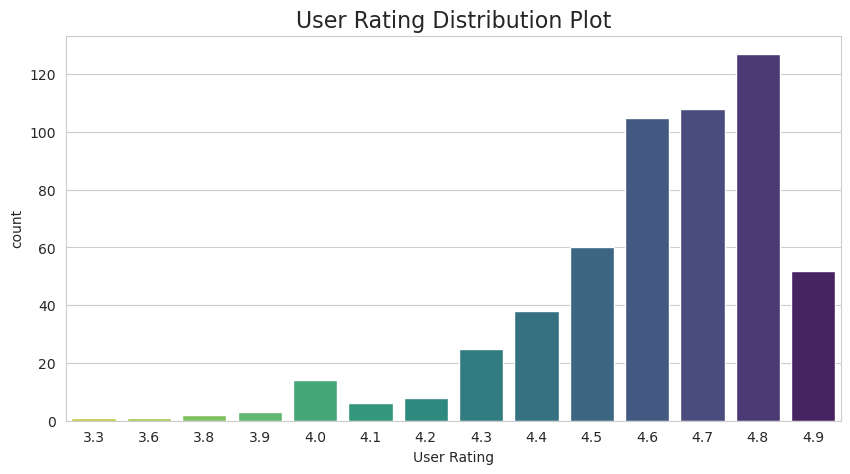

In [35]:

plt.figure(figsize=(10,5))
sns.countplot(x=df['User Rating'],palette='viridis_r')
plt.title('User Rating Distribution Plot',fontsize=16)
plt.show()

2. Simple plot of the review given to the books

<AxesSubplot:title={'center':'Reviews'}>

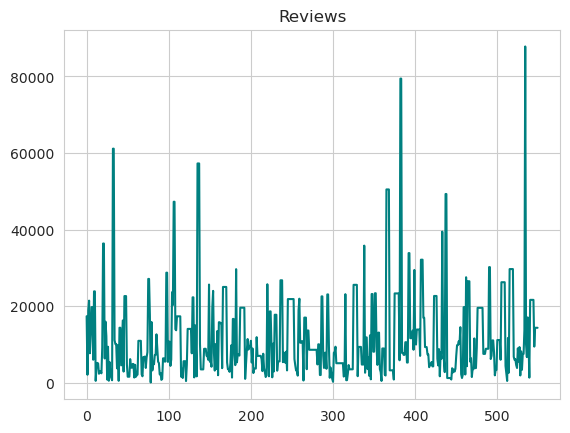

In [36]:
df.Reviews.plot(title = "Reviews" , color = "Teal")


3. Simple Year distribution plot

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


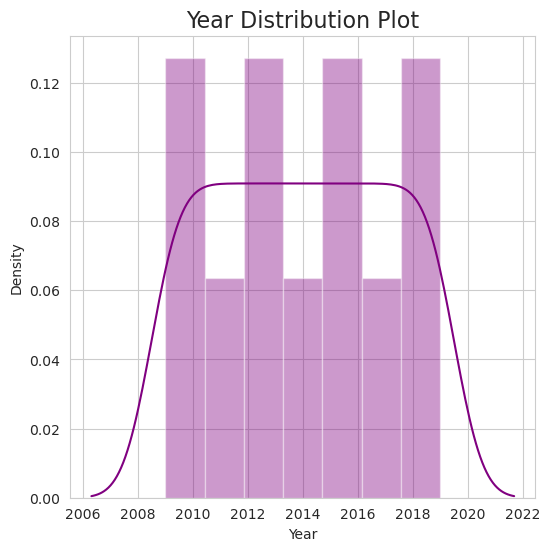

In [37]:
plt.figure(figsize=(6,6))
sns.distplot(df['Year'],color='purple')
plt.title('Year Distribution Plot',fontsize=16)
plt.show()
filterwarnings('ignore')



4.Plot of year and price as compare the other dataaset

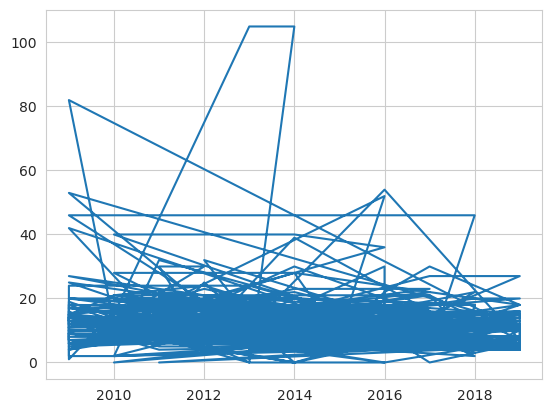

In [38]:
plt.plot(df['Year'],df['Price'])

Q10. Pie chart  of the books whose Genre was Fiction and Non-Fiction. 

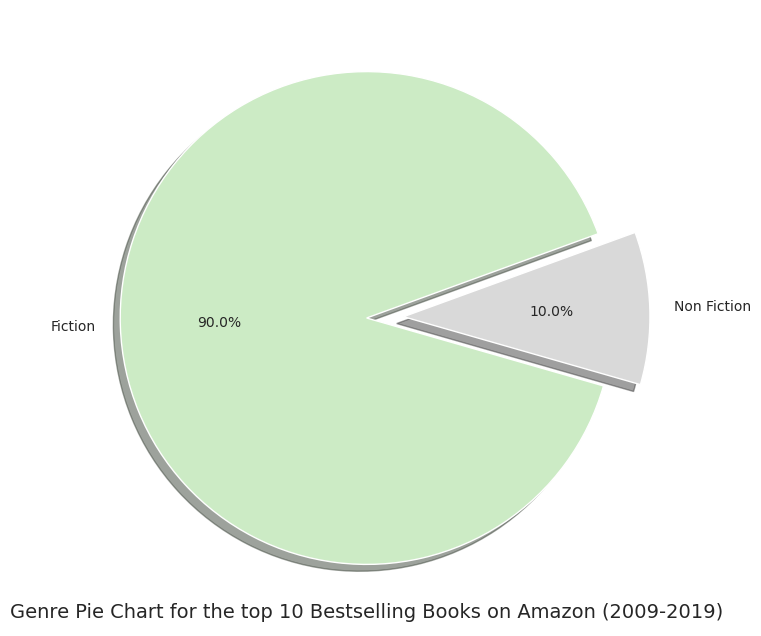

In [39]:
pie_1 = df.drop_duplicates('Name').sort_values('Reviews',ascending=False)['Genre'].head(10).value_counts()
sns.set_palette('Set3_r')
plt.figure(figsize=(8,8))
plt.pie(pie_1,explode = [0,0.15],labels=['Fiction','Non Fiction'],autopct='%.1f%%',shadow=True,startangle=20)
plt.title('Genre Pie Chart for the top 10 Bestselling Books on Amazon (2009-2019)',fontdict={'size':14},y=0);

Q11.The distribution plot for the Price of the books:

<AxesSubplot:xlabel='Genre', ylabel='Reviews'>

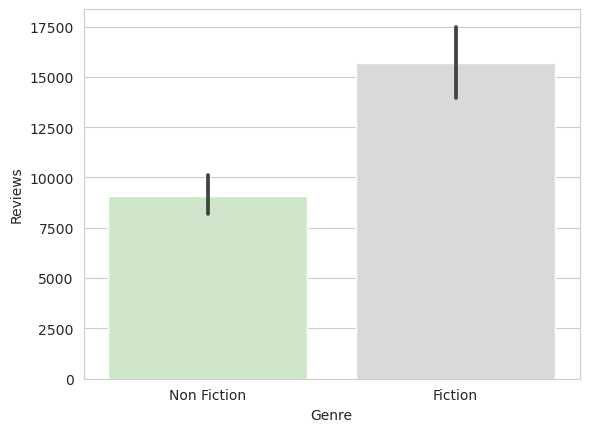

In [40]:
sns.barplot( data = df , x = 'Genre', y = 'Reviews' )

Q12. The distribution plot for the Reviews of the books:

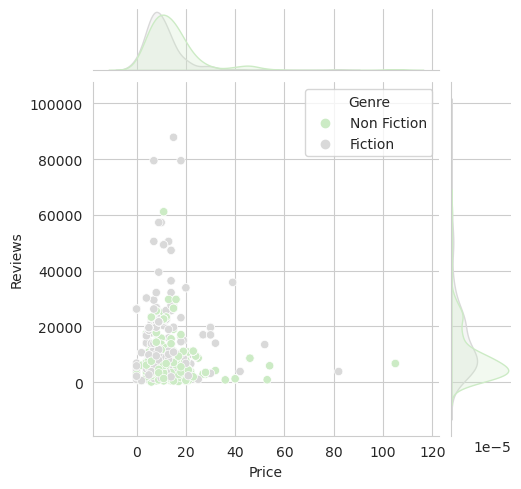

In [41]:

sns.jointplot(x=df['Price'],y=df['Reviews'],alpha=1, kind = "scatter",height = 5,hue=df['Genre'] )
plt.show()

--- We'll try to find the most famous Author on the basis of the number of different books which were counted as the Bestsellers on Amazon and to see IF there's any correlation between the books---

In [42]:
Counter(df.drop_duplicates('Name')['Author']).most_common()[0]

('Jeff Kinney', 12)

Q13. Now the books of jeff kinney which are selected as best sellers 

In [43]:
new_df = df.drop_duplicates('Name')
new_df[new_df['Author'] == "Jeff Kinney"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
